In [1]:
# Main imports
import numpy as np
import pandas as pd

# Import matplotlib and such
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.ion()

# Import function for drawing thermodynamic models
from helper_functions import thermodynamic_model

In [2]:
# Set global styles
textwidth=5.5
halfcolwidth=3
fontsize=8
titlesize=10
panel_label_size=12
legend_fontsize=7
markersize=5
mpl.rcParams['font.size'] = fontsize
mpl.rcParams['text.usetex'] = False

# Get default colors
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

# Used to create color gradient across data points of different P values
color_strong = np.array([.11, .69, .93])
color_weak = np.array([1.00, .94, .21])

# Conversion parameter
kbt_to_kcal = 1/1.62

In [3]:
# Used to annotate a regime of the expression manifold
def annotate_regime(ax,x,y,n,color='k'):
    ax.plot(x,y,'o',
            markersize=10,
            markeredgecolor=color,
            markerfacecolor='white',
            markeredgewidth=.5)
    ax.text(x,y,'%d'%n,
            color=color,
            horizontalalignment='center',
            verticalalignment='center',
            fontsize=8,
            fontweight='regular')

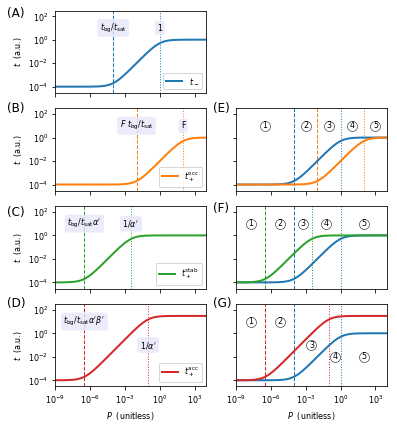

In [4]:
### Figure 12: regime derivation
fig, axs = plt.subplots(4,2, figsize=[textwidth,6], sharex=True, sharey=True)

# P values for continuous curve
Ps = np.logspace(-9,4,100)

# Assign colors to 4 different curves
bas_color = colors[0]
occ_color = colors[1]
rec_color = colors[2]
acc_color = colors[3]

# Parameters for thermodynamic model
t_sat=1
alpha_rec = 300
alpha_acc = 10
beta = 30
F=100
t_bg=1E-4

# Compute coordinates of expression manifold
t_bas = thermodynamic_model(t_sat=t_sat, t_bg=t_bg, P=Ps, F=0, alpha=0, beta=1, )
t_occ = thermodynamic_model(t_sat=t_sat, t_bg=t_bg, P=Ps, F=F, alpha=0, beta=1)
t_rec = thermodynamic_model(t_sat=t_sat, t_bg=t_bg, P=Ps, F=F, alpha=alpha_rec, beta=1)
t_acc = thermodynamic_model(t_sat=t_sat, t_bg=t_bg, P=Ps, F=F, alpha=alpha_acc, beta=beta)

# Set thresholds
P1_bas = t_bg/t_sat
P2_bas = 1
P1_occ = F*t_bg/t_sat
P2_occ = F
P1_rec = t_bg/(alpha_rec*t_sat)
P2_rec = 1/alpha_rec
P1_acc = t_bg/(alpha_acc*beta*t_sat)
P2_acc = 1/alpha_acc

# Set lims
xlim = np.array([min(Ps),max(Ps)])
ylim = np.array([3E-5,3E2])
yticks = np.logspace(-4,2,4)

# Set line styles
vline_kwargs = {'linewidth':1, 'alpha':1}

# Set text box style
box_props = dict(boxstyle='round', facecolor='lavender', alpha=.8, edgecolor='none')
text_kwargs = {'fontsize':8, 'verticalalignment':'center', 'horizontalalignment':'center', 
               'bbox':box_props}
text_height = 1E1

### Panel A: basal curve
ax = axs[0,0]

# Annotate transitions
ax.text(P1_bas,text_height,'$t_\\mathrm{bg} / t_\\mathrm{sat}$', **text_kwargs)
ax.text(P2_bas,text_height,'1', **text_kwargs)

# Draw vertical markers
ax.axvline(P1_bas, color=bas_color,  linestyle='--', **vline_kwargs)
ax.axvline(P2_bas, color=bas_color,  linestyle=':', **vline_kwargs)

# Draw curve
ax.loglog(Ps,t_bas, color=bas_color, linewidth=2, label='$t_-$')

# Style plot
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_yticks(yticks)
ax.set_ylabel('$t$  (a.u.)')
ax.legend(loc='lower right')


### Panel B: occlusion curve
ax = axs[1,0]

# Annotate transitions
ax.text(P1_occ,text_height,'$F\ t_\\mathrm{bg} / t_\\mathrm{sat}$', **text_kwargs)
ax.text(P2_occ,text_height,'F', **text_kwargs)

# Draw vertical markers
ax.axvline(P1_occ, color=occ_color, linestyle='--', **vline_kwargs)
ax.axvline(P2_occ, color=occ_color, linestyle=':', **vline_kwargs)

# Draw curve
ax.loglog(Ps,t_occ, color=occ_color, linewidth=2, label='$t_+^\\mathrm{occ}$')

# Style plot
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_yticks(yticks)
ax.set_ylabel('$t$  (a.u.)')
ax.legend(loc='lower right')


### Panel C: recruitment curve
ax = axs[2,0]

# Annotate transitions
ax.text(P1_rec,text_height,'$t_\\mathrm{bg} / t_\\mathrm{sat} \\alpha\'$', **text_kwargs)
ax.text(P2_rec,text_height,'$1 / \\alpha\'$', **text_kwargs)

# Draw vertical markers
ax.axvline(P1_rec, color=rec_color, linestyle='--', **vline_kwargs)
ax.axvline(P2_rec, color=rec_color, linestyle=':', **vline_kwargs)

# Draw curve
ax.loglog(Ps,t_rec, color=rec_color, linewidth=2, label='$t_+^\\mathrm{stab}$')

# Style plot
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_yticks(yticks)
ax.set_ylabel('$t$  (a.u.)')
ax.legend(loc='lower right')


### Panel D: acceleration curve
ax = axs[3,0]

# Annotate transitions
ax.text(P1_acc,text_height,'$t_\\mathrm{bg} / t_\\mathrm{sat} \\alpha\' \\beta\'$', **text_kwargs)
ax.text(P2_acc,1E-1,'$1 / \\alpha\'$', **text_kwargs)

# Draw vertical markers
ax.axvline(P1_acc, color=acc_color, linestyle='--', **vline_kwargs)
ax.axvline(P2_acc, color=acc_color, linestyle=':', **vline_kwargs)

# Draw curve
ax.loglog(Ps,t_acc, color=acc_color, linewidth=2, label='$t_+^\\mathrm{acc}$')

# Style plot
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_yticks(yticks)
ax.set_ylabel('$t$  (a.u.)')
ax.set_xlabel('$P$  (unitless)')
ax.legend(loc='lower right')


### Panel E: occlusion manifold
ax = axs[1,1]

# Draw vertical markers
ax.axvline(P1_bas, color=bas_color,  linestyle='--', **vline_kwargs)
ax.axvline(P2_bas, color=bas_color,  linestyle=':', **vline_kwargs)
ax.axvline(P1_occ, color=occ_color, linestyle='--', **vline_kwargs)
ax.axvline(P2_occ, color=occ_color, linestyle=':', **vline_kwargs)

# Draw curves
ax.loglog(Ps,t_bas, color=bas_color, linewidth=2)
ax.loglog(Ps,t_occ, color=occ_color, linewidth=2)

# Annotate regimes
annotate_regime(ax=ax, n=1, x=np.sqrt(P1_bas*xlim[0]), y=text_height)
annotate_regime(ax=ax, n=2, x=np.sqrt(P1_bas*P1_occ), y=text_height)
annotate_regime(ax=ax, n=3, x=np.sqrt(P2_bas*P1_occ), y=text_height)
annotate_regime(ax=ax, n=4, x=np.sqrt(P2_bas*P2_occ), y=text_height)
annotate_regime(ax=ax, n=5, x=np.sqrt(xlim[1]*P2_occ), y=text_height)

# Style plot
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_yticks(yticks)


### Panel F: recruitment (stabilization) manifold
ax = axs[2,1]

# Draw vertical markers
ax.axvline(P1_bas, color=bas_color,  linestyle='--', **vline_kwargs)
ax.axvline(P2_bas, color=bas_color,  linestyle=':', **vline_kwargs)
ax.axvline(P1_rec, color=rec_color, linestyle='--', **vline_kwargs)
ax.axvline(P2_rec, color=rec_color, linestyle=':', **vline_kwargs)

# Draw curves
ax.loglog(Ps,t_bas, color=bas_color, linewidth=2)
ax.loglog(Ps,t_rec, color=rec_color, linewidth=2)

# Annotate regimes
annotate_regime(ax=ax, n=1, x=np.sqrt(P1_rec*xlim[0]), y=text_height)
annotate_regime(ax=ax, n=2, x=np.sqrt(P1_rec*P1_bas), y=text_height)
annotate_regime(ax=ax, n=3, x=np.sqrt(P2_rec*P1_bas), y=text_height)
annotate_regime(ax=ax, n=4, x=np.sqrt(P2_rec*P2_bas), y=text_height)
annotate_regime(ax=ax, n=5, x=np.sqrt(xlim[1]*P2_bas), y=text_height)

# Style plot
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_yticks(yticks)


### Panel G: acceleration manifold
ax = axs[3,1]

# Draw vertical markers
ax.axvline(P1_bas, color=bas_color,  linestyle='--', **vline_kwargs)
ax.axvline(P2_bas, color=bas_color,  linestyle=':', **vline_kwargs)
ax.axvline(P1_acc, color=acc_color, linestyle='--', **vline_kwargs)
ax.axvline(P2_acc, color=acc_color, linestyle=':', **vline_kwargs)

# Draw curves
ax.loglog(Ps,t_bas, color=bas_color, linewidth=2)
ax.loglog(Ps,t_acc, color=acc_color, linewidth=2)

# Annotate regimes
annotate_regime(ax=ax, n=1, x=np.sqrt(P1_acc*xlim[0]), y=text_height)
annotate_regime(ax=ax, n=2, x=np.sqrt(P1_acc*P1_bas), y=text_height)
annotate_regime(ax=ax, n=3, x=np.sqrt(P2_acc*P1_bas), y=1E-1)
annotate_regime(ax=ax, n=4, x=np.sqrt(P2_acc*P2_bas), y=1E-2)
annotate_regime(ax=ax, n=5, x=np.sqrt(xlim[1]*P2_bas), y=1E-2)

# Style plot
ax.set_ylim(ylim)
ax.set_xlim(xlim)
ax.set_xlabel('$P$  (unitless)')
ax.set_yticks(yticks)


#### Label panels
plt.figtext(.01,.98,'(A)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.01,.76,'(B)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.01,.52,'(C)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.01,.31,'(D)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.53,.76,'(E)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.53,.53,'(F)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
plt.figtext(.53,.31,'(G)', fontsize=panel_label_size, horizontalalignment='left', 
            verticalalignment='top')
axs[0,1].axis('off')

plt.tight_layout(w_pad=2)

# Save
plt.savefig('../figures/plt_regimes.pdf', transparent=True)